In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simple SIR model

In [2]:
#SIR model

def flowSIR(x, t):
    dx=np.zeros(x.size)
    
    dx[0] =  - alpha * x[0] * x[1]    
    dx[1] =  alpha * x[0] * x[1] - beta * x[1]
    dx[2] =  beta * x[1]   
    return dx

Text(0, 0.5, 'x,y,z')

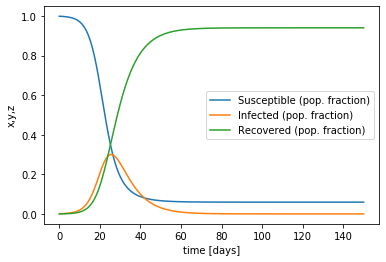

In [3]:
#Parameters

alpha= 0.45
beta = 0.15


# integration

y0 = np.array([.999,.001,0])      #define array and set initial conditions

t = np.linspace(0,150,150)

y = odeint(flowSIR, y0, t)

plt.plot(t,y[:,0], label = 'Susceptible (pop. fraction)')
plt.plot(t,y[:,1], label = 'Infected (pop. fraction)')
plt.plot(t,y[:,2], label = 'Recovered (pop. fraction)')
plt.legend()


plt.xlabel("time [days]")
plt.ylabel("x,y,z")

Text(0, 0.5, 'new infections (pop. fraction)')

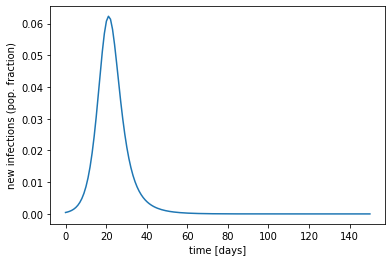

In [4]:
#new infections per day

plt.plot(t,alpha * y[:,0]* y[:,1])

plt.xlabel("time [days]")
plt.ylabel("new infections (pop. fraction)")

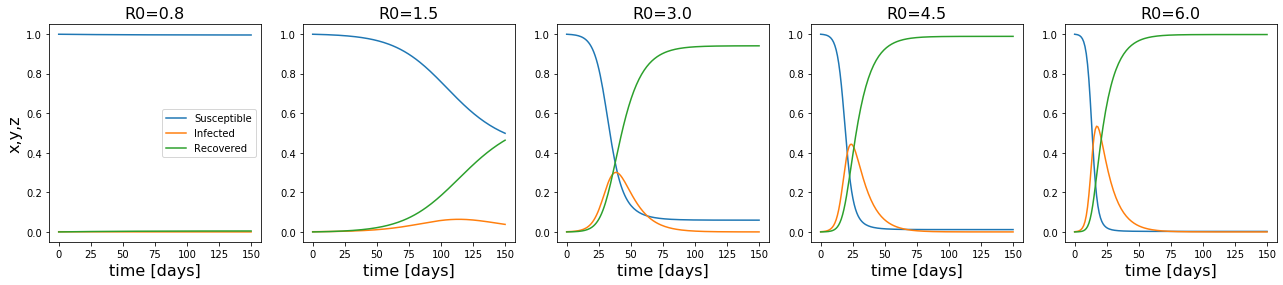

In [5]:
#Parameters
beta = 0.1
alphas= [0.08,0.15,0.3,0.45,0.6]

# integration

y0 = np.array([.999,.001,0])      #define array and set initial conditions

t = np.linspace(0,150,150)


fig, ax = plt.subplots(1, 5, figsize=(22,4))
plt.subplots_adjust(hspace = 0.2)



for alpha_idx,alpha in enumerate(alphas):

    title =  'R0='+str(round(alpha/beta, 1))

    y = odeint(flowSIR, y0, t)

    ax[alpha_idx].plot(t,y[:,0], label = 'Susceptible')
    ax[alpha_idx].plot(t,y[:,1], label = 'Infected')
    ax[alpha_idx].plot(t,y[:,2], label = 'Recovered')
    ax[alpha_idx].set_xlabel('time [days]', fontsize = 16)
    ax[alpha_idx].set_title(title, fontsize = 16)
    
ax[0].set_ylabel('x,y,z', fontsize = 16)
ax[0].legend()



As we can see above, for $R_0 > 1$, a peak shown up in the number of infected and greater $R_0$ results in a stronger peak. 

# SIR model with time dependent infection rate

In [6]:
#SIR model

def flowSIR_at(x, t):
    dx=np.zeros(x.size)
    
    dx[0] =  - alpha(t) * x[0] * x[1]    
    dx[1] =  alpha(t) * x[0] * x[1] - beta * x[1]
    dx[2] =  beta * x[1]   
    return dx


#time dependent infection rate
def alpha(t):
    if(t<interv_time):
        return(alpha_before)
    else: 
        return(alpha_after)
            

In [7]:
#Parameters
beta = 0.15

# without intervention
alpha_normal= 0.4

# with intervention
alpha_intervented= 0.2

#intervention Time
interv_time = 20

Text(0, 0.5, 'Infected  (pop. fraction)')

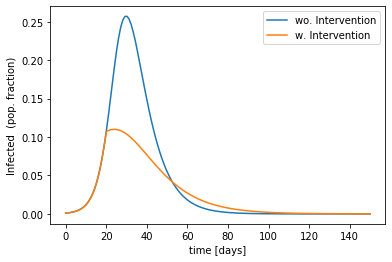

In [8]:
y0 = np.array([.999,.001,0])      #define array and set initial conditions

t = np.linspace(0,150,150)

alpha_before = alpha_normal
alpha_after = alpha_normal
y1 = odeint(flowSIR_at, y0, t)

alpha_after = alpha_intervented
y2 = odeint(flowSIR_at, y0, t)

plt.plot(t,y1[:,1], label = 'wo. Intervention')
plt.plot(t,y2[:,1], label = 'w. Intervention')
plt.legend()

plt.xlabel("time [days]")
plt.ylabel("Infected  (pop. fraction)")

Now we can study how choosing different intervention times and different intervention strengths affect the outbreak:

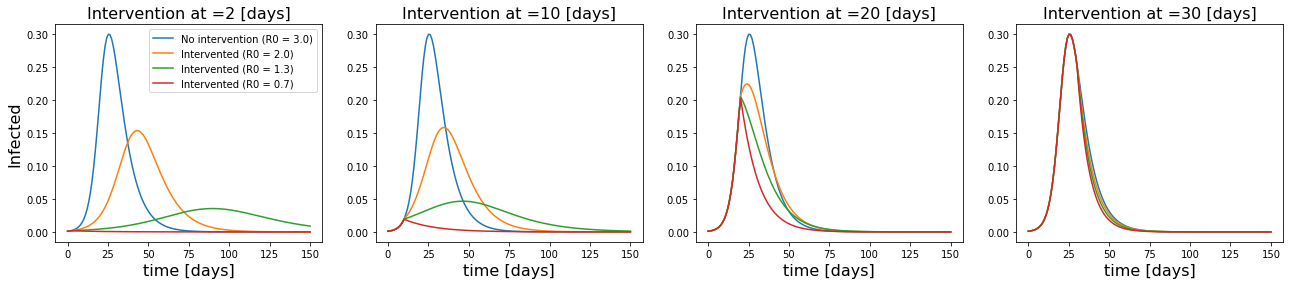

In [9]:
#Parameters
beta = 0.15

# without intervention
alpha_normal= 0.45

# with intervention
alphas_intervented= [0.3,0.2,0.1]

#intervention Time
interv_times = [2,10,20,30]

fig, ax = plt.subplots(1, 4, figsize=(22,4))
plt.subplots_adjust(hspace = 0.2)



for t_idx,interv_time in enumerate(interv_times):
    
    alpha_before = alpha_normal
    alpha_after = alpha_normal
    y = odeint(flowSIR_at, y0, t)

    lb =  'No intervention (R0 = '+str(round((alpha_before/beta), 1))+')'

    y = odeint(flowSIR_at, y0, t)
    ax[t_idx].plot(t,y[:,1], label = lb)
        
    for alpha_idx,alpha_intervented in enumerate(alphas_intervented):
        
        alpha_after = alpha_intervented
        lb =  'Intervented (R0 = '+str(round((alpha_after/beta), 1))+')'
        title =  'Intervention at ='+str(interv_time)+' [days]'

        y1 = odeint(flowSIR_at, y0, t)

        ax[t_idx].plot(t,y1[:,1], label = lb)
        ax[t_idx].set_xlabel('time [days]', fontsize = 16)
        ax[t_idx].set_title(title, fontsize = 16)
    
ax[0].set_ylabel('Infected', fontsize = 16)
ax[0].legend()


Feel free to play with the values for "alphas_intervented" and "interv_times" for more details.

# Effect of a vaccine

We describe vaccination as a shortcurt to recovered/immune, here introduced as a 4th variable that however does not change.

Text(0, 0.5, 'x,y1, y2,z')

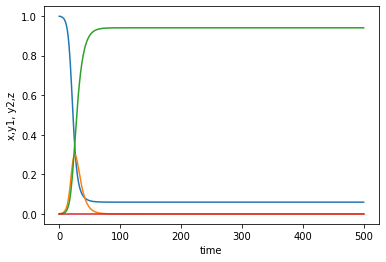

In [10]:
#SIR model with vaccine

def flowSIR_v(x, t):
    dx=np.zeros(x.size)
    
    dx[0] =  - alpha  * x[0] * x[1]    
    dx[1] =  alpha * x[0] * x[1] - beta * x[1]
    dx[2] =  beta * x[1]  
    dx[3] = 0
    return dx

#Parameters

alpha = 0.45
beta = 0.15


y0 = np.array([.999,0.001,0,0])      #define array and set initial conditions

t = np.linspace(0,500,500)

y = odeint(flowSIR_v, y0, t)

plt.plot(t,y[:,0])
plt.plot(t,y[:,1])
plt.plot(t,y[:,2])
plt.plot(t,y[:,3])


plt.xlabel("time")
plt.ylabel("x,y1, y2,z")

We can check the effect of fraction of initially vaccinated (0, 0.3, 0.6) on disease outbreak:

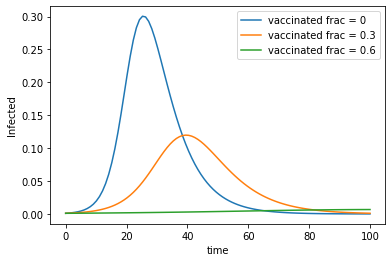

In [11]:
t = np.linspace(0,100,100)

# --------------
y0 = np.array([.999,0.001,0,0])      #define array and set initial conditions
y = odeint(flowSIR_v, y0, t)
plt.plot(t,y[:,1], label = 'vaccinated frac = 0')

# --------------
y0 = np.array([.699,0.001,0,0.3])      #define array and set initial conditions
y = odeint(flowSIR_v, y0, t)
plt.plot(t,y[:,1], label = 'vaccinated frac = 0.3')

# --------------
y0 = np.array([.399,0.001,0,0.6])      #define array and set initial conditions
y = odeint(flowSIR_v, y0, t)
plt.plot(t,y[:,1], label = 'vaccinated frac = 0.6')


plt.xlabel("time")
plt.ylabel("Infected")
plt.legend()

To find the fraction of population that should be initially vaccinated, we vary it and plot the total infected as function of it.

Text(0, 0.5, 'total infected')

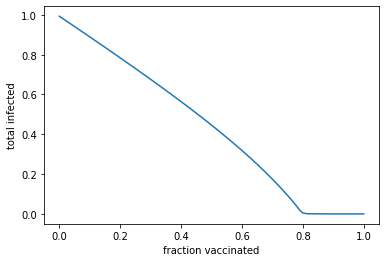

In [12]:
t = np.linspace(0,500,500)
total_inf=np.zeros(101)
aa=np.linspace(0,1,101)

alpha = 0.75
beta = 0.15

for i in range(101):
    a=aa[i]
    y0 = np.array([1-a-0.0001,0.0001,0,a]) #define array and set initial conditions
    y = odeint(flowSIR_v, y0, t)
    total_inf[i]=y[-1][2]+y[-1][1]


plt.plot(aa,total_inf)


plt.xlabel("fraction vaccinated")
plt.ylabel("total infected") 


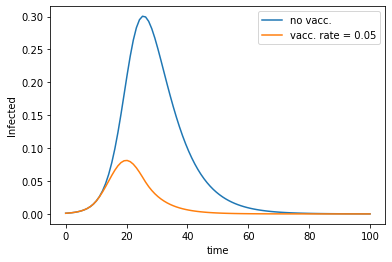

In [40]:
#SIR model with vaccine

def flowSIR_vt(x, t):
    dx=np.zeros(x.size)
    
    dx[0] = - alpha  * x[0] * x[1]  - rate_vac(t) * f(x[0])
    dx[1] = alpha * x[0] * x[1] - beta * x[1]
    dx[2] = beta * x[1]  
    dx[3] = rate_vac(t) * f(x[0])

    return dx

#time dependent vaccination rate
def rate_vac(t):
    if(t<vaccin_start_time):
        return(0)
    else:
        return(vaccine_rate)
    
#time dependent vaccination rate
def f(x):
    if(x<0.001):
        return(0) #To avoid negative values for population 
    else:
        return(1)


# ---------------
t = np.linspace(0,100,100)
y0 = np.array([.999,0.001,0,0])

alpha = 0.45
beta = 0.15

vaccin_start_time = 0
vaccine_rate = 0

y = odeint(flowSIR_vt, y0, t)

plt.plot(t,y[:,1], label = 'no vacc.')

# ---------------
vaccin_start_time = 10
vaccine_rate = 0.05

y1 = odeint(flowSIR_vt, y0, t)

plt.plot(t,y1[:,1], label = 'vacc. rate = 0.05')


plt.xlabel("time")
plt.ylabel("Infected")

plt.legend()